In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

2024-06-01 11:31:36.065063: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_images, train_labels),  (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

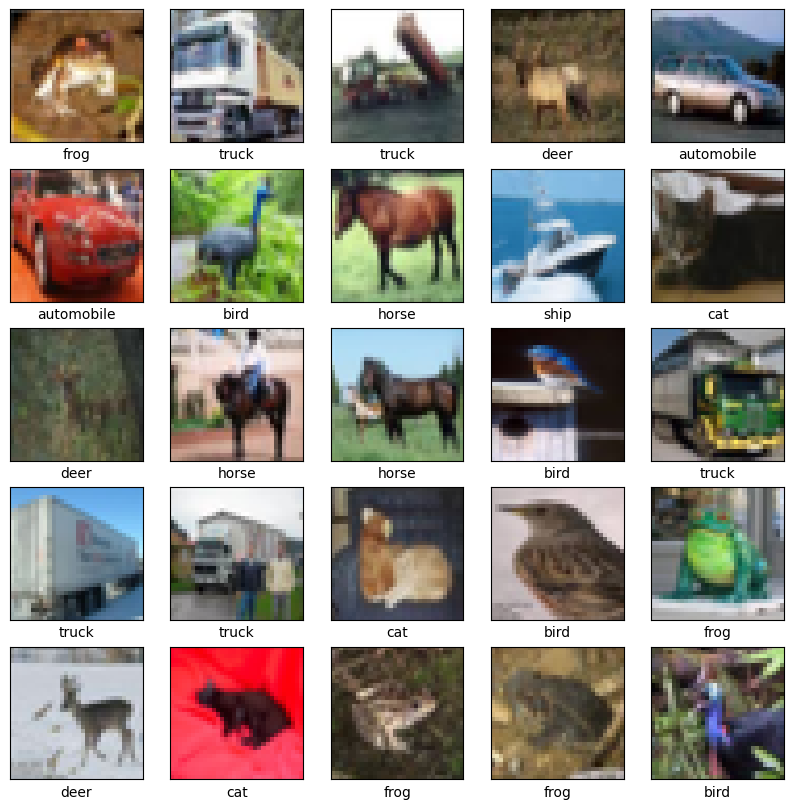

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])

    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
## Creating the Convolutional Neural Network model 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

## Neural Network
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10))

## Display model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 64)                692288    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

2024-06-01 11:31:43.355938: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.5998 - accuracy: 0.4121 - val_loss: 1.2341 - val_accuracy: 0.5699
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2733 - accuracy: 0.5393 - val_loss: 1.0770 - val_accuracy: 0.6231
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1444 - accuracy: 0.5911 - val_loss: 1.0046 - val_accuracy: 0.6525
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0535 - accuracy: 0.6256 - val_loss: 0.9523 - val_accuracy: 0.6707
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9801 - accuracy: 0.6508 - val_loss: 0.9385 - val_accuracy: 0.6793
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9088 - accuracy: 0.6736 - val_loss: 0.9248 - val_accuracy: 0.6799
Epoch 7/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8576 - accuracy: 0.6918 - val_loss: 0.9544 -

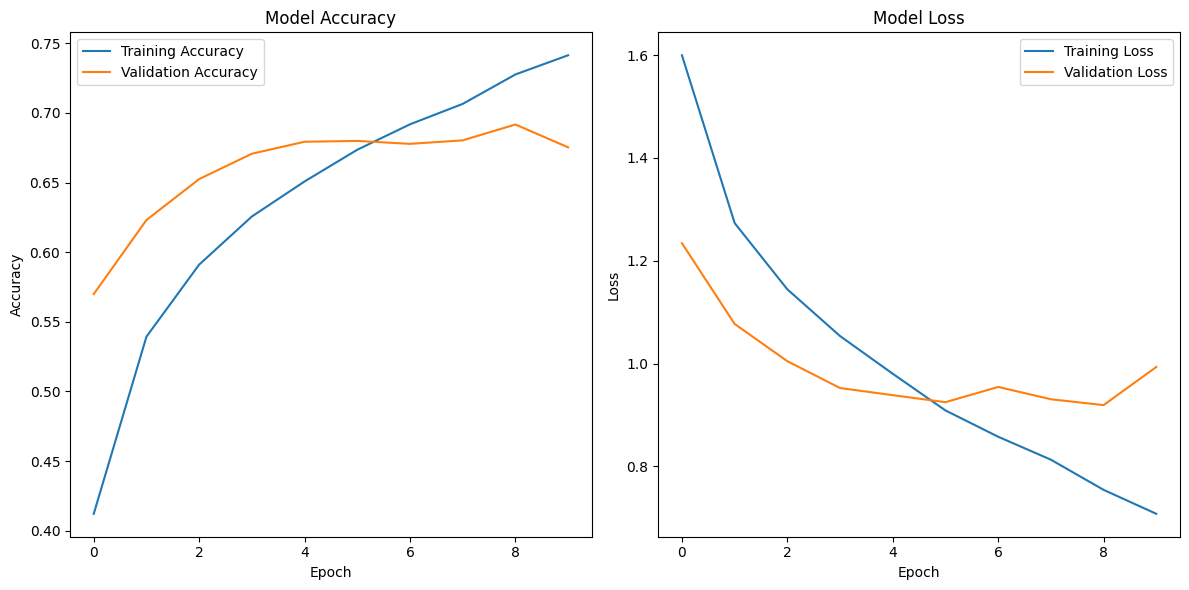

In [7]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

313/313 [==============================] - 2s 5ms/step - loss: 0.9933 - accuracy: 0.6753
Test accuracy: 0.6753000020980835
Test loss: 0.9933245182037354
